In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install imbalanced-learn

# **IMPORT DATASET**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Teman/dataset_sdn.csv')

In [5]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
#Melihat informasi secara detail mengenai dataset yang dimuiliki
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

# **DATA PREPROCESSING**

In [7]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


Handling Missing Value

In [8]:
# prompt: Handling null value

# 1. Remove rows with any null values
df.dropna(inplace=True)


# After handling null values, verify the changes
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [9]:
# Check for duplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

# Count the number of duplicates
num_duplicates = len(duplicates)
print(f"\nNumber of duplicate rows: {num_duplicates}")

# Remove duplicates (if needed)
df_no_duplicates = df.drop_duplicates()
print(f"\nShape of DataFrame with duplicates: {df.shape}")
print(f"Shape of DataFrame without duplicates: {df_no_duplicates.shape}")

Duplicate Rows:
          dt  switch        src       dst  pktcount  bytecount  dur  \
13     11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
15     11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
30     11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
34     11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
40     11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...      ...     ...        ...       ...       ...        ...  ...   
33474   3249       8  10.0.0.12  10.0.0.5     88782   94641612  197   
33501   3609       8   10.0.0.3  10.0.0.5    119500  124519000  407   
33512   3609       8   10.0.0.3  10.0.0.5    119500  124519000  407   
33559   3159       8  10.0.0.12  10.0.0.5     48292   51479272  107   
33584   3249       8   10.0.0.3  10.0.0.5     14973   15601866   47   

        dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
13     716000000  1.010000e+11      3  ...      451     

In [10]:
df_no_duplicates.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [11]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98748 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           98748 non-null  int64  
 1   switch       98748 non-null  int64  
 2   src          98748 non-null  object 
 3   dst          98748 non-null  object 
 4   pktcount     98748 non-null  int64  
 5   bytecount    98748 non-null  int64  
 6   dur          98748 non-null  int64  
 7   dur_nsec     98748 non-null  int64  
 8   tot_dur      98748 non-null  float64
 9   flows        98748 non-null  int64  
 10  packetins    98748 non-null  int64  
 11  pktperflow   98748 non-null  int64  
 12  byteperflow  98748 non-null  int64  
 13  pktrate      98748 non-null  int64  
 14  Pairflow     98748 non-null  int64  
 15  Protocol     98748 non-null  object 
 16  port_no      98748 non-null  int64  
 17  tx_bytes     98748 non-null  int64  
 18  rx_bytes     98748 non-null  int64  
 19  tx_kbps 

# **SELEKSI FEATURE**

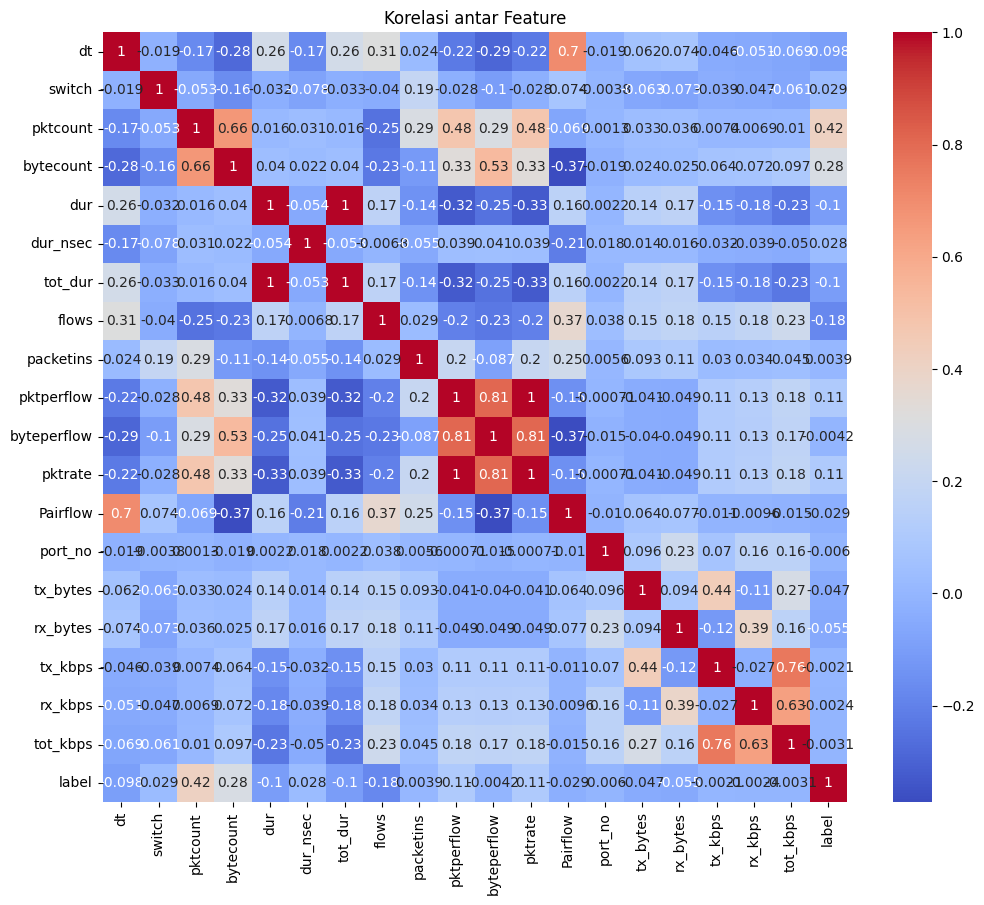

In [12]:
#Korelasi antar feature
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation calculation
numerical_df = df_no_duplicates.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Feature')
plt.show()

In [13]:
target_label = 'label'

# Select only numerical features and the target label
numerical_df = df_no_duplicates.select_dtypes(include=['number'])
numerical_df[target_label] = df_no_duplicates[target_label]

# Calculate correlation with target label
correlations = numerical_df.corr()[target_label]

# Filter for correlations greater than 0.01
selected_features = correlations[abs(correlations) > 0.01].index.tolist()

# Remove the target label itself from the selected features
selected_features.remove(target_label)

# Create a new DataFrame with selected features and the target label
filtered_df = df_no_duplicates[selected_features + [target_label]]


In [14]:
# Display the filtered DataFrame
filtered_df.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,pktperflow,pktrate,Pairflow,tx_bytes,rx_bytes,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,13535,451,0,143928631,3917,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,13531,451,0,3842,3520,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,13534,451,0,3795,1242,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,13534,451,0,3688,1492,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,13534,451,0,3413,3665,0


# **HANDLING IMBALANCED DATA**

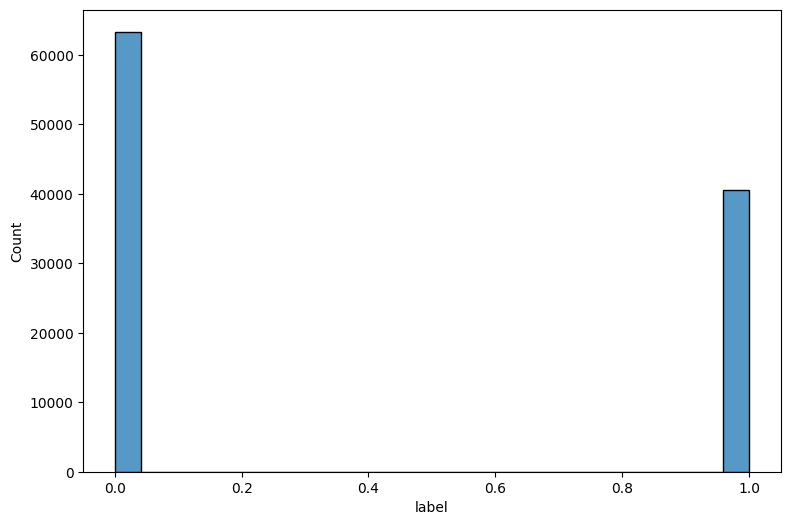

In [15]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=df, x='label')
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
# x = atribut yang memperngaruhi label
# y = label target
x = filtered_df.drop(['label'],axis=1)
y = filtered_df['label']

In [18]:
print(x.shape)
print(y.shape)

(98748, 13)
(98748,)


In [19]:
x

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,pktperflow,pktrate,Pairflow,tx_bytes,rx_bytes
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,13535,451,0,143928631,3917
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,13531,451,0,3842,3520
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,13534,451,0,3795,1242
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,13534,451,0,3688,1492
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,13534,451,0,3413,3665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,29,0,0,15209,12720
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,29,0,0,15099,14693
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,30,1,0,3409,3731
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,30,1,0,15209,12720


In [20]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
104340,0
104341,0
104342,0
104343,0


SMOTE

In [21]:
sm = SMOTE(random_state=42)
x_sampling, y_sampling = sm.fit_resample(x,y)

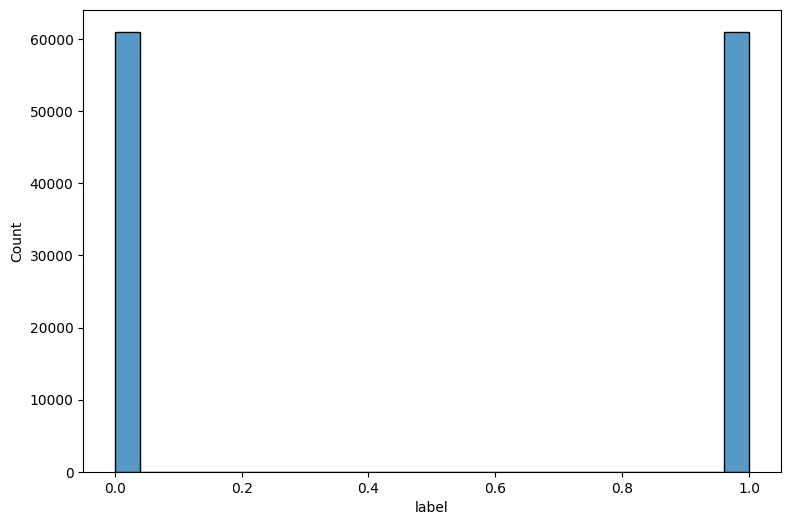

In [22]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

In [23]:
print(y_sampling.shape)

(122044,)


Undersampling

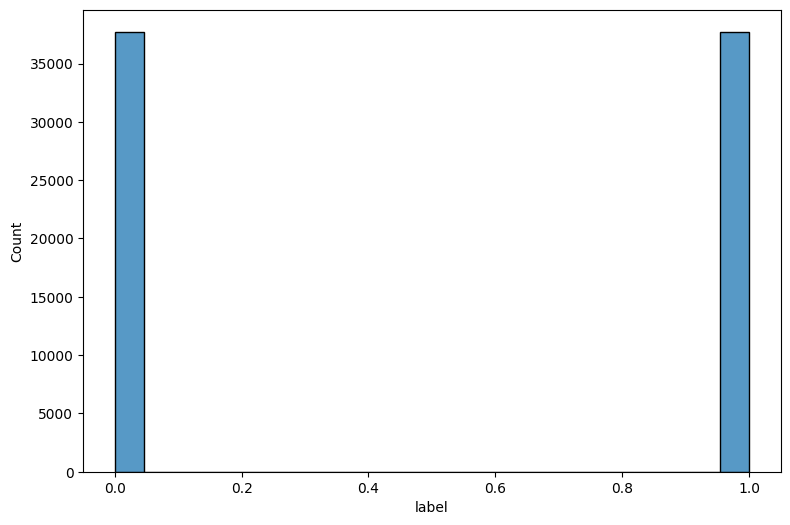

(75452,)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
rus = RandomUnderSampler(random_state=42)
x_undersampled, y_undersampled = rus.fit_resample(x, y)

fig = plt.subplots(figsize=(9, 6))
sns.histplot(data=y_undersampled)
plt.show()

y_undersampled.shape

# **MODELLING**

In [24]:
X = x_sampling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_sampling, test_size = 0.20, random_state = 7)

SVM

In [27]:
svm_model = SVC(kernel='rbf')  # You can try different kernels like 'rbf', 'poly'
svm_model.fit(x_train, y_train)

SVC()

In [28]:
hasil = svm_model.predict(x_test)

hasil

array([0, 1, 1, ..., 1, 0, 1])

In [29]:
round(accuracy_score(y_test,hasil),4)

0.9412

In [30]:
actual = y_test;
predicted =  hasil

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[11148  1076]
 [  359 11826]]
Accuracy_Score :  0.9412102093490106
Recall_Score :  [0.91197644 0.97053755]
precision_Score :  [0.9688016  0.91660208]
F1_Score :  [0.93953057 0.94279906]
Report : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     12224
           1       0.92      0.97      0.94     12185

    accuracy                           0.94     24409
   macro avg       0.94      0.94      0.94     24409
weighted avg       0.94      0.94      0.94     24409



KNN

In [31]:
param_grid = {'n_neighbors':np.arange(1,5)}
knn = GridSearchCV(KNeighborsClassifier(),param_grid, cv=10, scoring='accuracy')

knn.fit(x_train, y_train)
knn.best_params_

{'n_neighbors': 1}

In [32]:
#KNN Algorithm
k = 1
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=1)

In [33]:
hasil = knn.predict(x_test)

hasil

array([0, 1, 1, ..., 1, 0, 1])

In [34]:
round(accuracy_score(y_test,hasil),4)

0.9816

In [35]:
actual = y_test;
predicted =  knn.predict(x_test)

matrix = confusion_matrix(actual,predicted)
print('Confusion matrix : \n',matrix)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Confusion matrix : 
 [[12025   199]
 [  249 11936]]
Accuracy_Score :  0.9816461141382277
Recall_Score :  [0.98372055 0.97956504]
precision_Score :  [0.97971321 0.98360115]
F1_Score :  [0.98171279 0.98157895]
Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12224
           1       0.98      0.98      0.98     12185

    accuracy                           0.98     24409
   macro avg       0.98      0.98      0.98     24409
weighted avg       0.98      0.98      0.98     24409



In [ ]:
from google.colab import files
combined_df = pd.concat([x_undersampled, y_undersampled], axis=1)

combined_df.rename(columns={combined_df.columns[-1]: 'label'}, inplace=True)


In [ ]:
combined_df.to_csv('combined_data.csv', index=False)

# Unduh file
files.download('combined_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>